# Linear Regression and Polynomial Regression using Sklearn

## 1. Linear Regression:

- Definition: A linear regression model assumes a linear relationship between the dependent variable y and one or more independent variables X.

- Equation: The equation for simple linear regression (with one independent variable) is:
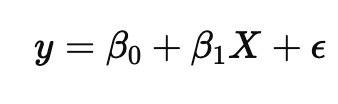

where: 

y is the dependent variable (the value you're trying to predict),

X is the independent variable,

β0 is the intercept (the value of y when X=0),

β1 is the slope (the change in y for a one-unit change in X),

ϵ is the error term.


- Key Characteristics:

Models a straight-line relationship between the independent and dependent variables.

Assumes that the relationship is additive.

Works well when the data shows a linear trend.

- Use Cases:

Predicting outcomes like house prices based on size, temperature forecasting, etc.

## 2. Polynomial Regression:

- Definition: Polynomial regression is a type of regression analysis in which the relationship between the independent variable X and the dependent variable y is modeled as an n-th degree polynomial.

- Equation: For a second-degree polynomial regression (quadratic regression), the model would look like:

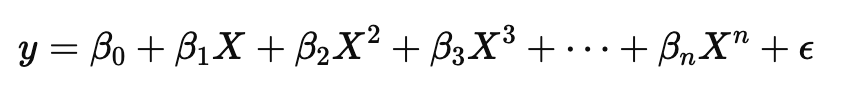

- Key Characteristics:

It can model non-linear relationships between the independent and dependent variables.

By increasing the degree of the polynomial (i.e., n), the model can fit more complex curves.

- Use Cases:

When the relationship between the dependent and independent variables is curved or follows a pattern that cannot be captured by a straight line (e.g., growth rates, sales trends over time).

## Comparison:

- Linear regression is simple and interpretable but might underfit the data if the relationship between the variables is non-linear.

- Polynomial regression is more flexible but can lead to overfitting, especially with higher-degree polynomials if the model fits too closely to the training data noise.

## Choosing between Linear and Polynomial Regression:

- If a scatter plot of the data shows a straight-line trend, linear regression is often sufficient.

- If the data shows a curvilinear trend, then polynomial regression might be more appropriate.

## Linear Regression normal solution from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import FloatSlider


In [15]:
# Generate synthetic data
np.random.seed(5)
X = 2 * np.random.rand(120, 1)
y = 4 + 3 * X + np.random.randn(120, 1)

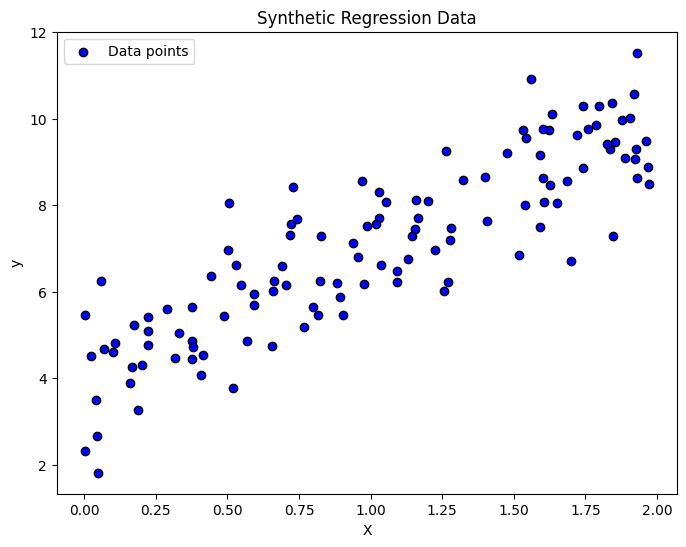

In [16]:
# Plotting the generated data
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
plt.scatter(X, y, color='blue', edgecolor='k', label='Data points')  # Plot the data points
plt.title('Synthetic Regression Data')  # Title of the plot
plt.xlabel('X')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [19]:
# Augmenting the feature matrix X with an additional column of ones for the intercept
X_b = np.c_[np.ones((120, 1)), X]  # Add x0 = 1 to each instance for the bias term

def plot_regression_closed_form(noise=1.0):
    # Modify the target values by adding Gaussian noise
    y_noisy = y + np.random.randn(120, 1) * noise  # Add noise to the original target data

    # Closed-form solution (Normal Equation) to find the best fitting parameters
    theta_best = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_noisy)  # Normal equation

    # Make predictions for new data points
    X_new = np.array([[0], [2]])  # New data points for prediction
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add the intercept term for new data points
    y_predict = X_new_b.dot(theta_best)  # Predictions using the normal equation

    # Plotting the results
    plt.figure(figsize=(8, 4))
    plt.plot(X, y_noisy, "b.", label='Data points')  # Plot noisy data points
    plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")  # Plot the regression line
    plt.xlabel("$x_1$", fontsize=18)  # Label for the x-axis
    plt.ylabel("$y$", rotation=0, fontsize=18)  # Label for the y-axis
    plt.title("Linear Regression via Normal Equation")  # Title of the plot
    plt.legend()  # Show legend
    plt.show()  # Display the plot

# Slider for noise level adjustment in the interactive plot
interact(plot_regression_closed_form, noise=widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='Noise level:'))


interactive(children=(FloatSlider(value=1.0, description='Noise level:', max=5.0), Output()), _dom_classes=('w…

<function __main__.plot_regression_closed_form(noise=1.0)>

### Linear Regression with Closed-Form Solution

This demonstrates the use of the closed-form solution for linear regression, commonly known as the Normal Equation

#### Key Components:

- **Feature Augmentation**:
  - **`np.c_`**: Combines arrays by adding a column of ones to the feature matrix `X`. This column represents the intercept term in the linear regression model.

- **Closed-Form Solution (Normal Equation)**:
  - **`inv()`**: Computes the inverse of a matrix. In the context of linear regression, it's used to solve the Normal Equation.
  - **`dot()`**: Performs matrix multiplication. It's used here to construct and solve the Normal Equation for finding the regression coefficients.

- **Prediction**:
  - New feature data `X_new` is created and used to predict responses based on the model fitted using the Normal Equation.

- **Plotting**:
  - **`plt.plot()`** and **`plt.scatter()`**: These functions are used to visualize the original noisy data and the predictions made by the regression model. This visualization helps in understanding the fit of the model to the data.

- **Interactivity**:
  - **`interact()`**: A function from `ipywidgets` that creates interactive user interface elements. It's used here to allow dynamic adjustment of the noise level in the dataset.
  - **`widgets.FloatSlider()`**: Provides a slider for adjusting the noise level, demonstrating how the model's performance changes as the data variability increases.


## Linear Regression using Sklearn

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to train the model and visualize the results
def train_and_visualize(noise_level=1.0):
    # Generate data with the specified noise level
    # Modify the target values by adding Gaussian noise
    y_noisy = y + np.random.randn(120, 1) * noise_level  # Add noise to the original target data

    # Initialize and train a Linear Regression model
    model = LinearRegression()
    model.fit(X, y_noisy)  # Fit model on the generated data
    y_pred = model.predict(X)  # Predict the responses based on the input features

    # Calculate the Mean Squared Error of the predictions
    mse = mean_squared_error(y_noisy, y_pred)  # Compute MSE to evaluate the model's accuracy

    # Visualize the data and the regression model's predictions
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y_noisy, color='blue', label='Data points')  # Plot actual data points
    plt.plot(X, y_pred, color='red', label='Regression line', linewidth=2)  # Plot regression line
    plt.title(f"Linear Regression with Noise Level = {noise_level}\nMSE = {mse:.2f}")  # Add title with MSE
    plt.xlabel('Feature (X)')  # X-axis label
    plt.ylabel('Target (y)')  # Y-axis label
    plt.legend()  # Show legend
    plt.show()

# Interactive slider for adjusting noise level in data generation
interact(train_and_visualize, noise_level=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description='Noise Level'))


interactive(children=(FloatSlider(value=1.0, description='Noise Level', max=3.0, min=0.1), Output()), _dom_cla…

<function __main__.train_and_visualize(noise_level=1.0)>

This demonstrates the impact of varying noise levels on linear regression analysis, allowing interactive adjustments to see how noise affects model accuracy, measured by Mean Squared Error (MSE).

#### Key components:

- **Model Training and Evaluation**: [Detailed Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
  - **`LinearRegression()`**: A simple yet powerful linear model from Scikit-learn that fits a linear equation to observed data.
    - `fit()`: Trains the model on the dataset.
    - `predict()`: Uses the trained model to make predictions on the same dataset, showcasing the model's fit.
  - **`mean_squared_error()`**: Computes the MSE between the observed targets and the predictions from the model, providing a quantitative measure of model accuracy.

- **Visualization**:
  - **Plotting Functions (`plt.scatter()` and `plt.plot()`)**: Visualize the original data and the regression line, respectively, allowing users to visually assess the model's performance against the actual data.

- **Interactive Control**:
  - **`interact()`**: Creates an interactive environment using `ipywidgets`, allowing the noise level parameter to be adjusted dynamically. This enables users to explore how changes in data quality (noise level) impact the linear regression model's accuracy.

## Polynomial Regression normal solution from scratch

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

# Generate synthetic data
np.random.seed(42)
X = 3 * np.random.rand(120, 1)
y = 5 + 2 * X**2 - 3 * X**3 + 0.2 * X**5 + np.random.randn(120, 1)  # Polynomial relationship

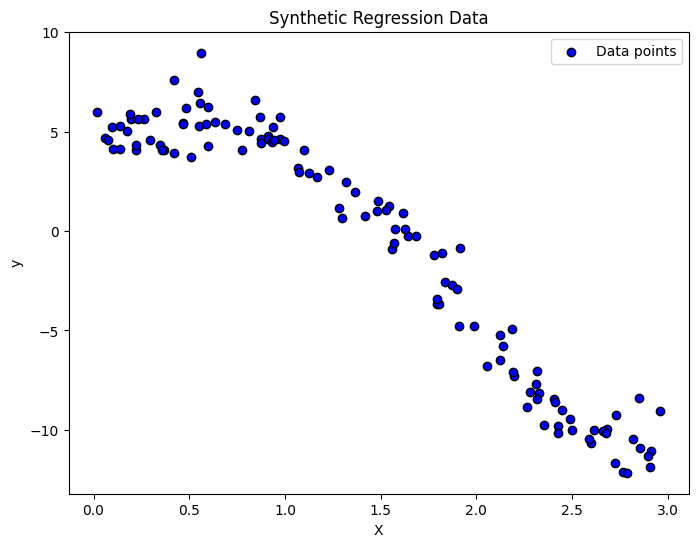

In [38]:
# Plotting the generated data
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
plt.scatter(X, y, color='blue', edgecolor='k', label='Data points')  # Plot the data points
plt.title('Synthetic Regression Data')  # Title of the plot
plt.xlabel('X')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [40]:
def plot_polynomial_regression(degree=2):
    # Generate polynomial features up to the specified degree for each x value
    X_poly = np.hstack([X**i for i in range(1, degree + 1)])
    X_poly_b = np.c_[np.ones((120, 1)), X_poly]  # Add an intercept term (x0 = 1) to each instance

    # Compute the model parameters (theta_best) using the Normal Equation
    theta_best = inv(X_poly_b.T.dot(X_poly_b)).dot(X_poly_b.T).dot(y)

    # Make predictions over a grid of values to visualize the fit
    X_new = np.linspace(0, 3, 120).reshape(120, 1)  # Generate new x values for making predictions
    X_new_poly = np.hstack([X_new**i for i in range(1, degree + 1)])  # Polynomial features for new x values
    X_new_poly_b = np.c_[np.ones((120, 1)), X_new_poly]  # Add intercept term
    y_predict = X_new_poly_b.dot(theta_best)  # Predict y values using the model

    # Plotting the results
    plt.figure(figsize=(10, 5))
    plt.plot(X, y, "b.", label="Data Points")  # Plot original data points
    plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")  # Plot the regression curve
    plt.xlabel("$x_1$", fontsize=18)  # x-axis label
    plt.ylabel("$y$", rotation=0, fontsize=18)  # y-axis label
    plt.title(f"Polynomial Regression Degree = {degree}")  # Chart title
    plt.legend()  # Show legend
    plt.show()

# Interactive widget to control the polynomial degree
interact(plot_polynomial_regression, degree=IntSlider(min=1, max=25, step=1, value=2, description='Polynomial Degree'))


interactive(children=(IntSlider(value=2, description='Polynomial Degree', max=25, min=1), Output()), _dom_clas…

<function __main__.plot_polynomial_regression(degree=2)>

### Polynomial Regression

This demonstrates how to perform and visualize polynomial regression using the Normal Equation.

#### Key Components:

- **Polynomial Feature Generation**:
  - **`np.hstack()`**: This function horizontally stacks arrays. It's used to generate polynomial features from the original feature set `X` by raising `X` to the power of each degree up to the specified polynomial degree.
  
- **Normal Equation**:
  - **`inv()`** and **`dot()`**: These numpy functions are used to compute the inverse of a matrix and perform matrix multiplication, respectively. They are crucial for solving the Normal Equation, which calculates the model parameters that minimize the least squares error between the predicted and actual values.

- **Prediction and Visualization**:
  - **`np.linspace()`**: Generates linearly spaced vectors, which are used to create new input features `X_new` for plotting the polynomial regression results.
  - **`plt.plot()`**: This function plots y-values against x-values. It is used twice: first to plot the original data points as blue dots, and second to plot the polynomial regression predictions as a red line.


## Polynomial Regression using Sklearn

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def plot_polynomial_regression_sklearn(degree=2):
    # Create a pipeline that first generates polynomial features of specified degree
    # then applies linear regression to the transformed data
    polynomial_regression = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    polynomial_regression.fit(X, y)  # Fit the polynomial model to the data

    # Predict y values using the fitted model for the original X data
    y_pred = polynomial_regression.predict(X)

    # Calculate the Mean Squared Error between actual and predicted y values
    mse = mean_squared_error(y, y_pred)

    # Generate new data points for a smoother prediction curve
    X_new = np.linspace(0, 3, 120).reshape(120, 1)
    y_new_pred = polynomial_regression.predict(X_new)

    # Plotting the actual data points and the model's predictions
    plt.figure(figsize=(10, 5))
    plt.plot(X, y, "b.", label="Data Points")  # Plot original data points as blue dots
    plt.plot(X_new, y_new_pred, "r-", linewidth=2, label="Predictions")  # Plot model predictions as a red line
    plt.xlabel("$x_1$", fontsize=18)  # X-axis label
    plt.ylabel("$y$", rotation=0, fontsize=18)  # Y-axis label
    plt.title(f"Sklearn Polynomial Regression Degree = {degree}\nMSE = {mse:.2f}")  # Title with MSE value
    plt.legend()  # Show legend
    plt.show()

# Interactive widget to control the polynomial degree for the regression model
interact(plot_polynomial_regression_sklearn, degree=IntSlider(min=1, max=10, step=1, value=2, description='Polynomial Degree'))


interactive(children=(IntSlider(value=2, description='Polynomial Degree', max=10, min=1), Output()), _dom_clas…

<function __main__.plot_polynomial_regression_sklearn(degree=2)>

### Polynomial Regression with Scikit-Learn

This demonstrates how to implement polynomial regression using scikit-learn's powerful tools such as `PolynomialFeatures` and `make_pipeline`. It incorporates interactivity that allows the user to adjust the degree of the polynomial and immediately see the effect on the regression model's accuracy and fit.

#### Key Components:

- **Polynomial Regression Model Creation**:
  - **`PolynomialFeatures(degree=degree)`**: Transforms the original input feature `X` into a new feature matrix containing all polynomial combinations up to the specified degree. It enriches the feature set to capture more complex relationships in the data. [Detailed Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
  - **`LinearRegression()`**: A linear estimator that fits a model to the polynomial-transformed features to predict the target variable `y`.
  - **`make_pipeline()`**: Combines the polynomial feature transformation and linear regression model into a single step, ensuring a clean and efficient workflow. [Detailed Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

- **Error Calculation**:
  - **`mean_squared_error(y, y_pred)`**: Computes the mean squared error, a measure of the model's accuracy. It quantifies the difference between the observed target values and the values predicted by the model.

- **Visualization**:
  - **Plot Setup**: Uses `matplotlib.pyplot` to create plots that visualize the actual data points and the predicted values from the model, allowing for visual assessment of the model's fit to the data.

- **Interactivity**:
  - **`interact()`**: A function from the `ipywidgets` library that creates an interactive slider widget. It lets users dynamically adjust the degree of the polynomial, providing real-time feedback on how model complexity influences the regression outcome.
  - **`IntSlider()`**: Configures the slider used in the interactive widget, defining the range and step values for the polynomial degree adjustments.